# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [5]:
# Your code 
df = pd.read_csv('/home/kingsam/Documents/Flatiron/labs/dsc-pandas-eda-lab/data/ames.csv')

The following code checks that you loaded the data correctly:

In [37]:
# Run this cell without changes

# Check that df is a dataframe
type(df) == pd.DataFrame

# Check that there are the correct number of rows
df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
df.shape[1] == 80

False

Inspect the contents of the dataframe:

In [9]:
# Run this cell without changes
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [10]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

<Axes: ylabel='Frequency'>

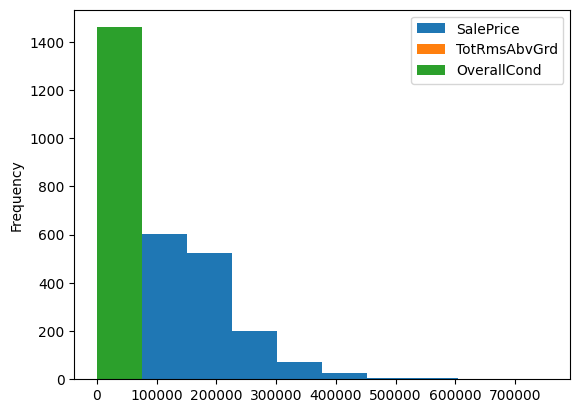

In [17]:
# Your code here
df.plot(kind = 'hist', y = ['SalePrice', 'TotRmsAbvGrd', 'OverallCond'])

Now, print out the mean, median, and standard deviation:

In [22]:
# Your code here
df.groupby('Id').agg('mean', 'median', 'std')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1457,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1458,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0


In the cell below, interpret the above information.

In [36]:
# Replace None with appropriate text
"""
In the above cell, we are grouping the data by the 'Id' column, and then aggregating the data using the mean, median, and standard deviation. This allows us to see the average, median, and spread of the data for each unique value in the 'Id' column.
"""

"\nIn the above cell, we are grouping the data by the 'Id' column, and then aggregating the data using the mean, median, and standard deviation. This allows us to see the average, median, and spread of the data for each unique value in the 'Id' column.\n"

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

<Axes: ylabel='Frequency'>

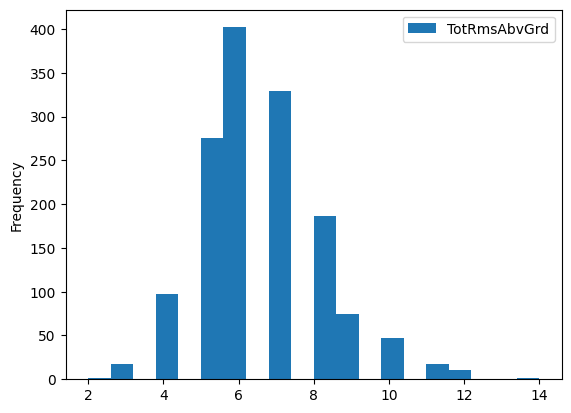

In [23]:
# Your code here
df.plot(kind='hist', y = 'TotRmsAbvGrd', bins = 20)

Now, print out the mean, median, and standard deviation:

In [26]:
# Your code here
df['TotRmsAbvGrd'].agg(['mean', 'std', 'median'])

mean      6.517808
std       1.625393
median    6.000000
Name: TotRmsAbvGrd, dtype: float64

In the cell below, interpret the above information.

In [35]:
# Replace None with appropriate text
"""
In the above cell, we are calculating the mean, standard deviation, and median of the 'TotRmsAbvGrd' column. This allows us to see the average, spread, and central tendency of the data in this column. The mean tells us the average number of rooms above ground, the standard deviation tells us how spread out the data is, and the median tells us the middle value of the data.
"""

"\nIn the above cell, we are calculating the mean, standard deviation, and median of the 'TotRmsAbvGrd' column. This allows us to see the average, spread, and central tendency of the data in this column. The mean tells us the average number of rooms above ground, the standard deviation tells us how spread out the data is, and the median tells us the middle value of the data.\n"

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

<Axes: ylabel='Frequency'>

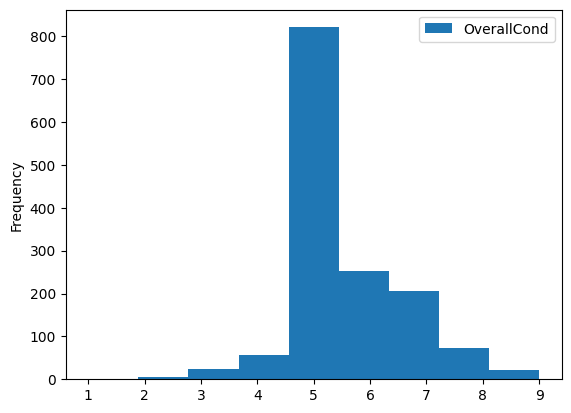

In [27]:
# Your code here
df.plot(kind='hist', y = 'OverallCond', bins = 9)

Now, print out the mean, median, and standard deviation:

In [28]:
# Your code here
df['OverallCond'].agg(['mean', 'std', 'median'])

mean      5.575342
std       1.112799
median    5.000000
Name: OverallCond, dtype: float64

In the cell below, interpret the above information.

In [34]:
# Replace None with appropriate text
"""
The above cell is similar to the previous cell, but this time we are looking at the 'OverallCond' column. We are calculating the mean, standard deviation, and median of this column to understand the average, spread, and central tendency of the data. The mean tells us the average overall condition of the houses, the standard deviation tells us how spread out the data is, and the median tells us the middle value of the data. Basically showing how the sale of houses is affected by the overall condition of the house.
"""

"\nThe above cell is similar to the previous cell, but this time we are looking at the 'OverallCond' column. We are calculating the mean, standard deviation, and median of this column to understand the average, spread, and central tendency of the data. The mean tells us the average overall condition of the houses, the standard deviation tells us how spread out the data is, and the median tells us the middle value of the data. Basically showing how the sale of houses is affected by the overall condition of the house.\n"

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [29]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5 ]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [31]:
# Run this cell without changes

# Check that all of them still have 80 columns
below_average_condition.shape[1] == 80
average_condition.shape[1] == 80
above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
below_average_condition.shape[0] == 88
average_condition.shape[0] == 821
above_average_condition.shape[0] == 551

True

The following code will produce a plot of the distributions of sale price for each of these subsets:

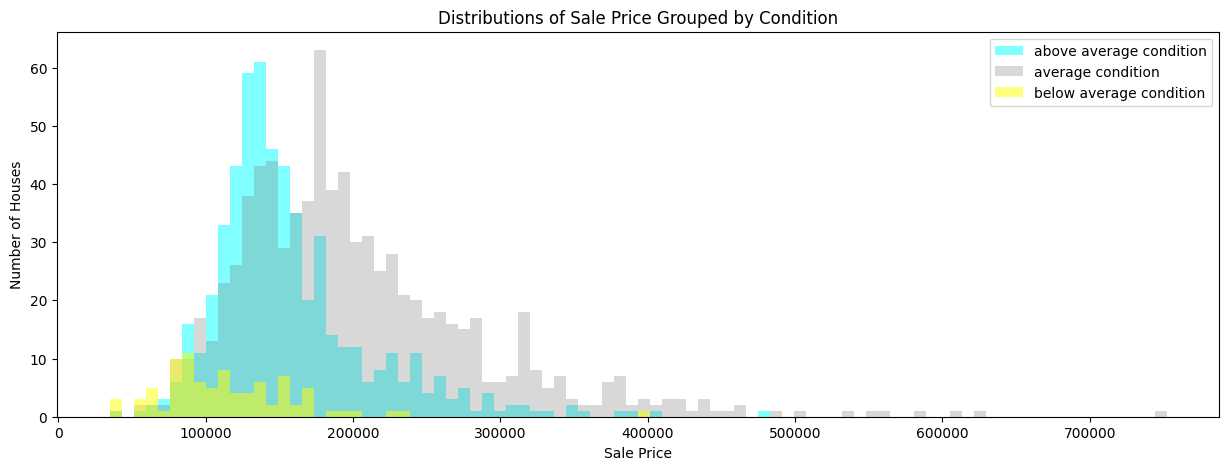

In [32]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [33]:
# Replace None with appropriate text
"""
The overall condition of a house can have a significant impact on the sale price. In the plot above, we have grouped the data by the condition of the house (above average, average, or below average) and plotted histograms of the sale prices for each group. The histograms show the distribution of sale prices within each group, allowing us to compare the distributions and see how the condition of the house affects the sale price and units sold. The plot shows that houses in above average condition tend to have higher sale prices, while houses in below average condition tend to have lower sale prices.
"""

'\nThe overall condition of a house can have a significant impact on the sale price. In the plot above, we have grouped the data by the condition of the house (above average, average, or below average) and plotted histograms of the sale prices for each group. The histograms show the distribution of sale prices within each group, allowing us to compare the distributions and see how the condition of the house affects the sale price and units sold. The plot shows that houses in above average condition tend to have higher sale prices, while houses in below average condition tend to have lower sale prices.\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [55]:
# Your code here
num_df = df.select_dtypes(include = 'number')
num_df
corr_matrix = num_df.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)
most_corr = corr_matrix['SalePrice'].sort_values(ascending = False).index[0:2]
most_corr

Index(['SalePrice', 'OverallQual'], dtype='object')

Now, find the ***most negatively correlated*** column:

In [63]:
# Your code here
corr_matrix.mean()
neg_corr = corr_matrix[corr_matrix < 0].mean()
most_neg_corr = neg_corr.sort_values(ascending = False).index[-1]
most_neg_corr
# pos_corr = corr_matrix[corr_matrix > 0].mean()
# pos_corr

'YearBuilt'

Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

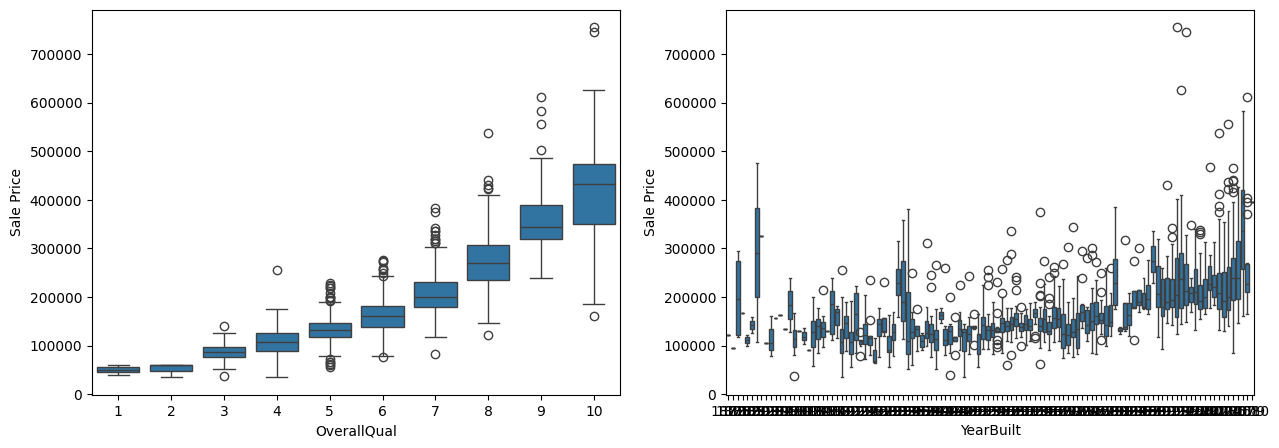

In [70]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    data=df,
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['YearBuilt'],
    y=df["SalePrice"],
    data=df,
    ax=ax2
    
)

# Customize labels
ax1.set_title(None)
ax1.set_xlabel('OverallQual')
ax1.set_ylabel("Sale Price")
ax2.set_title(None)
ax2.set_xlabel('YearBuilt')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [71]:
# Replace None with appropriate text
"""
The plots above show the relationship between the sale price and two features that are highly correlated with the sale price. The first plot shows the distribution of sale prices for different overall quality ratings. As the overall quality rating increases, the median sale price also increases, indicating a positive correlation between these two variables. The second plot shows the distribution of sale prices for different years built. The plot shows that newer houses tend to have higher sale prices, indicating a negative correlation between these two variables. These plots help us understand how these features are related to the sale price and how they can be used to predict the sale price of a house.
"""

'\nThe plots above show the relationship between the sale price and two features that are highly correlated with the sale price. The first plot shows the distribution of sale prices for different overall quality ratings. As the overall quality rating increases, the median sale price also increases, indicating a positive correlation between these two variables. The second plot shows the distribution of sale prices for different years built. The plot shows that newer houses tend to have higher sale prices, indicating a negative correlation between these two variables. These plots help us understand how these features are related to the sale price and how they can be used to predict the sale price of a house.\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [72]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

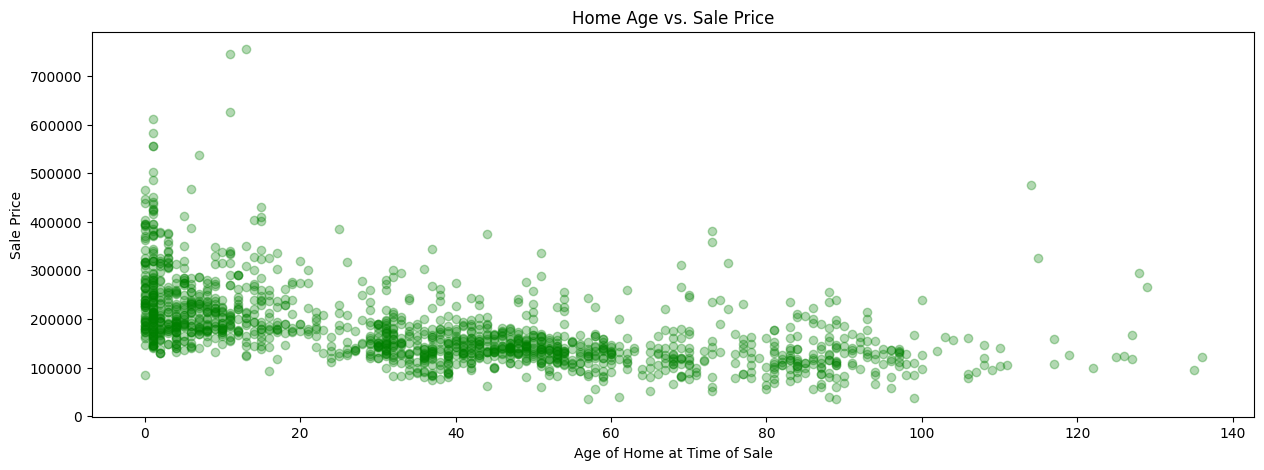

In [73]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [74]:
# Replace None with appropriate text
"""
The plot above shows the relationship between the age of a house and the sale price. We have calculated the age of each house by subtracting the year it was built from the year it was sold. The plot shows that there is a wide range of sale prices for houses of different ages, but there is a general trend that newer houses tend to have higher sale prices. This indicates that the age of a house is an important factor in determining its sale price, with newer houses generally being more valuable than older houses.
"""

'\nThe plot above shows the relationship between the age of a house and the sale price. We have calculated the age of each house by subtracting the year it was built from the year it was sold. The plot shows that there is a wide range of sale prices for houses of different ages, but there is a general trend that newer houses tend to have higher sale prices. This indicates that the age of a house is an important factor in determining its sale price, with newer houses generally being more valuable than older houses.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.